In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv")

In [3]:
data.shape

(768, 9)

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


C:\Users\ML Lab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

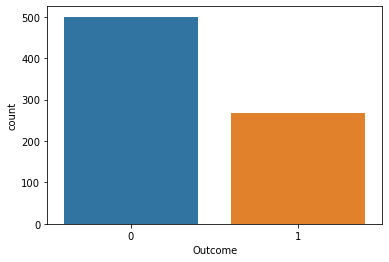

In [11]:
import seaborn as sns
sns.countplot(data["Outcome"])

In [12]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,f1_score

In [23]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [26]:
model = LogisticRegression(max_iter=2000)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [27]:
cm = confusion_matrix(y_test,y_pred)

accuracy_score(y_test,y_pred)

In [96]:
precision_score(y_test,y_pred)

0.7894736842105263

In [97]:
recall_score(y_test,y_pred)

0.5454545454545454

In [101]:
f1_score(y_test,y_pred)

0.6451612903225806

# Standard Scaling

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

# Principal Component Analysis

In [80]:
#pca function
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.88735668]


In [81]:
model.fit(X_train,y_train)
y_pred2 = model.predict(X_test)
cm2 = confusion_matrix(y_test,y_pred2)
print(cm)

[[91  8]
 [25 30]]


In [82]:
accuracy_score(y_test,y_pred2)

0.6233766233766234

In [102]:
precision_score(y_test,y_pred2)

0.3333333333333333

In [103]:
recall_score(y_test,y_pred2)

0.05454545454545454

In [104]:
f1_score(y_test,y_pred2)

0.09375

# Singular Value Decomposition(SVD)

In [93]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 7)
X_train = svd.fit_transform(x_train)
X_test = svd.fit_transform(x_test)

In [94]:
model.fit(X_train,y_train)
y_pred3 = model.predict(X_test)

In [105]:
accuracy_score(y_test,y_pred3)

0.7012987012987013

In [106]:
recall_score(y_test,y_pred3)

0.5636363636363636

In [107]:
precision_score(y_test,y_pred3)

0.5849056603773585

In [108]:
f1_score(y_test,y_pred3)

0.5740740740740741

# Linear Discriminant Analysis

In [109]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [114]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(x_train, y_train)
X_test = lda.transform(x_test)

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).